In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
print("Shape of the dataset :", data.shape)

Shape of the dataset : (2200, 8)


In [14]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [16]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [18]:
print(" Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print(" Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print(" Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print(" Average Temperature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print(" Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print(" Average PH Value of the Soil : {0:.2f}".format(data['ph'].mean()))
print(" Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

 Average Ratio of Nitrogen in the Soil : 50.55
 Average Ratio of Phosphorous in the Soil : 53.36
 Average Ratio of Potassium in the Soil : 48.15
 Average Temperature in Celsius : 25.62
 Average Relative Humidity in % : 71.48
 Average PH Value of the Soil : 6.47
 Average Rainfall in mm : 103.46


In [19]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:", x['P'].min())
    print("Average Phosphorous required:", x['P'].mean())
    print("Maximum Phosphorous required:", x['P'].max())
    print("Statistics for Pottasium")
    print("Minimum Pottasium required:", x['K'].min())
    print("Average Pottasium required:", x['K'].mean())
    print("Maximum Pottasium required:", x['K'].max())
    print("Statistics for Temperature")
    print("Minimum Temperature required: {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required: {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required: {0:.2f}".format(x['temperature'].max()))
    print("Statistics for Humidity")
    print("Minimum Humidity required: {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required: {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required: {0:.2f}".format(x['humidity'].max()))
    print("Statistics for PH")
    print("Minimum PH required: {0:.2f}".format(x['ph'].min()))
    print("Average PH required: {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required: {0:.2f}".format(x['ph'].max()))
    print("Statistics for Rainfall")
    print("Minimum Rainfall required: {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required: {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required: {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [20]:
@interact
def compare(conditions = ['N', 'P', 'K', 'temperature', 'ph', 'humidity', 'rainfall']):
    print("Crops that require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("Crops that require less than average", conditions, '\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

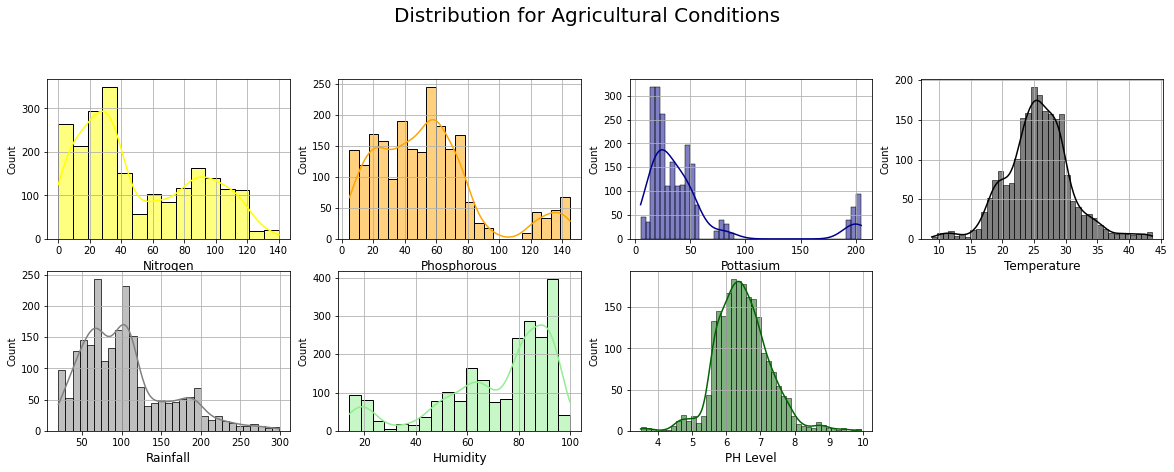

In [57]:
plt.figure(figsize=(20,10))
plt.subplot(3,4,1)
sns.histplot(data['N'], color="yellow",kde=True)
plt.xlabel('Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(3,4,2)
sns.histplot(data['P'], color="orange",kde=True)
plt.xlabel('Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(3,4,3)
sns.histplot(data['K'], color="darkblue",kde=True)
plt.xlabel('Pottasium', fontsize = 12)
plt.grid()

plt.subplot(3,4,4)
sns.histplot(data['temperature'], color="black",kde=True)
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(3,4,5)
sns.histplot(data['rainfall'], color="grey",kde=True)
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(3,4,6)
sns.histplot(data['humidity'], color="lightgreen",kde=True)
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(3,4,7)
sns.histplot(data['ph'], color="darkgreen",kde=True)
plt.xlabel('PH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [33]:

print("Crops that require very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 130]['label'].unique())
print("Crops that require very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops that require very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops that require very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops that require very Low Temperature:", data[data['temperature'] < 10]['label'].unique())
print("Crops that require very High Temperature:", data[data['temperature'] > 40]['label'].unique())
print("Crops that require very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops that require very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops that require very High pH:", data[data['ph'] > 9]['label'].unique())

Crops that require very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops that require very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops that require very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops that require very High Rainfall: ['rice' 'papaya' 'coconut']
Crops that require very Low Temperature: ['grapes']
Crops that require very High Temperature: ['grapes' 'papaya']
Crops that require very Low Humidity: ['chickpea' 'kidneybeans']
Crops that require very Low pH: ['mothbeans']
Crops that require very High pH: ['mothbeans']


In [34]:
print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("Monsoon Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Monsoon Crops
['rice' 'papaya' 'coconut']


In [36]:
from sklearn.cluster import KMeans
x = data.drop(['label'], axis=1)
x = x.values
print(x.shape)

(2200, 7)


<function matplotlib.pyplot.show(close=None, block=None)>

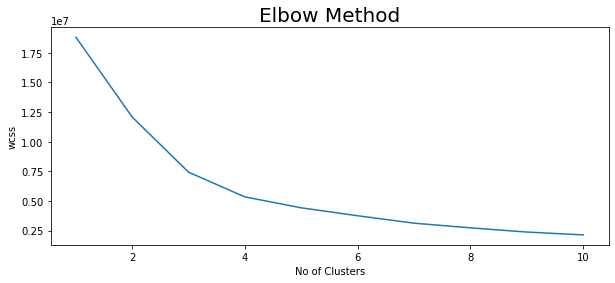

In [25]:
plt.rcParams['figure.figsize'] = (10,4)
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 2000, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method', fontsize = 20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show


In [26]:
km = KMeans(n_clusters = 4, init = 'k-means++',  max_iter = 2000, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})
print("Lets Check the results after applying K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets Check the results after applying K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in Third Cluster: ['grapes' 'apple']
Crops in Fourth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [27]:
y = data['label']
x = data.drop(['label'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("The Shape Of x train:", x_train.shape)
print("The Shape Of x test:", x_test.shape)
print("The Shape Of y train:", y_train.shape)
print("The Shape Of y test:", y_test.shape)

The Shape Of x train: (1760, 7)
The Shape Of x test: (440, 7)
The Shape Of y train: (1760,)
The Shape Of y test: (440,)


In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


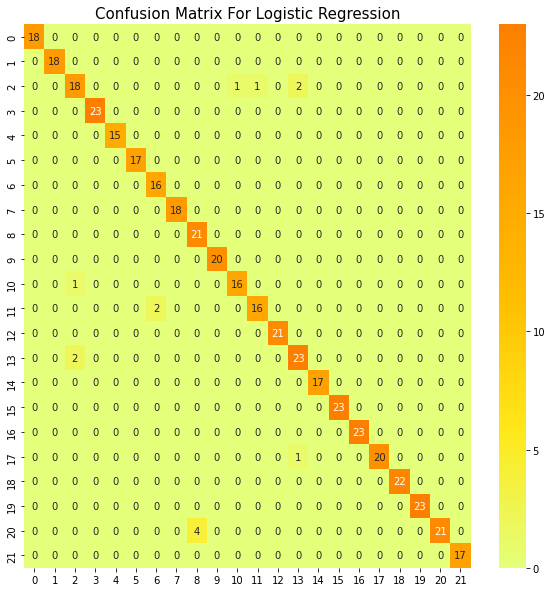

In [30]:
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = (10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix For Logistic Regression', fontsize = 15)
plt.show()

In [31]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

In [32]:
prediction = model.predict((np.array([[90, 40, 20, 20, 80, 7, 200]])))
print("The Suggested Crop for given climatic condition is :",prediction)

The Suggested Crop for given climatic condition is : ['rice']
